# Day 2 - Row 2 - 01 Gradient_Descent

## Manuell

In [ ]:
import numpy as np

- Natürliche Zahlen
- Ganze Zahlen
- Rationale Zahlen
- Rationale Zahlen und Irrationale Zahlen - > R
- Complexe Zahlen (Quantum Comp und Frequenz-Analyse) -> C schliesst R ein

In [ ]:
X = [1,2,3,4,5,6,7,8,9,10]
X = np.array(X).astype(np.float32)

In [ ]:
X

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.], dtype=float32)

In [ ]:
X = np.arange(1,11).astype(np.float32)
X

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.], dtype=float32)

In [ ]:
np.linspace(1, 10, 10)

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.])

In [ ]:
# List comprehension
Y = [2*x + 6 for x in X]
print(Y)

[8.0, 10.0, 12.0, 14.0, 16.0, 18.0, 20.0, 22.0, 24.0, 26.0]


Wir erstellen hier eine Liste.
[   ]

2*x + 6 für jedes Element x in X

In [ ]:
len(X)

10

(m_deriv
b_deriv)
m_deriv ist die partielle Ableitung nach m (Gewicht)
b_deriv ist --- nach b (Bias)

$MSE = 1/N\sum_{i=0} ^N (Y_i - (mX_i + b))^2$





In [ ]:
def update_weights(m, b, X, Y, learning_rate):
    m_deriv = 0
    b_deriv = 0
    N = len(X)
    # Ableitung MSE
    for i in range(N): # pytorch - backward # gradient tape
        # Calculate partial derivatives
        # -x (innere Ableitung) * 2(y - (mx + b)) (äussere Ableitung)
        m_deriv += -2*X[i] * (Y[i] - (m*X[i] + b))

        # -2(y - (mx + b))
        b_deriv += -2*(Y[i] - (m*X[i] + b))


    # We subtract because the derivatives point in direction of steepest ascent
    m -= (m_deriv / float(N)) * learning_rate # später - in pytorch step
    b -= (b_deriv / float(N)) * learning_rate
    history_m.append(m)
    history_b.append(b)

    return m,b


In [ ]:
def train(epochs, learning_rate:int)-> tuple[float, float]:
    m=0
    b=0
    for epoch in range(epochs):
        # abbruchskriterium - "early stopping"
        m,b = update_weights(m, b, X, Y, learning_rate)
        if epoch%200==0:
          print(f"Epoch: {epoch}, m: {m}, b: {b}")
    return m,b

In [ ]:
epochs = 3000
history_m = []
history_b = []

In [ ]:
train(epochs, learning_rate=1e-2)

Epoch: 0, m: 2.2, b: 0.34
Epoch: 200, m: 2.345054235925057, b: 3.5977937018081247
Epoch: 400, m: 2.1487140244340046, b: 4.964679378106762
Epoch: 600, m: 2.064093869197309, b: 5.553789867704444
Epoch: 800, m: 2.0276236493788433, b: 5.807689059840105
Epoch: 1000, m: 2.011905444538794, b: 5.917116409896572
Epoch: 1200, m: 2.0051310964645697, b: 5.964278217855305
Epoch: 1400, m: 2.002211437871381, b: 5.984604362359297
Epoch: 1600, m: 2.0009531018355915, b: 5.993364674321015
Epoch: 1800, m: 2.000410774872206, b: 5.9971402583060405
Epoch: 2000, m: 2.0001770387899125, b: 5.998767487392202
Epoch: 2200, m: 2.000076301485934, b: 5.999468802608436
Epoch: 2400, m: 2.0000328849782507, b: 5.999771060622812
Epoch: 2600, m: 2.000014173010935, b: 5.9999013300154385
Epoch: 2800, m: 2.0000061083889857, b: 5.999957474480918


(2.000002643741119, 5.999981594743939)

In [ ]:
history_m[500]

2.0976302065442782

In [ ]:
history_b[1999]

5.998762289578513

In [ ]:
import matplotlib.pyplot as plt
plt.rcdefaults()
from pylab import rcParams
%matplotlib inline

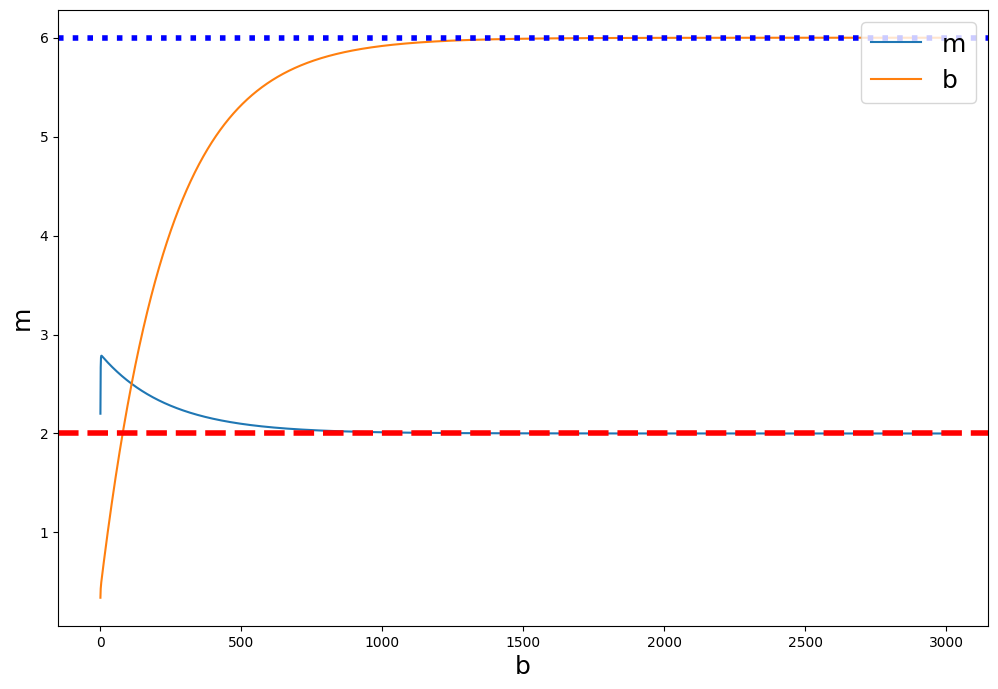

In [ ]:

plt.figure(figsize=(12,8))
plt.plot(history_m[0:epochs])
plt.plot(history_b[0:epochs])

plt.axhline(y=2, xmin=0, xmax=epochs, c='r', linewidth=4,linestyle='--')
plt.axhline(y=6, xmin=0, xmax=epochs, c='b', linewidth=4, linestyle=':')
plt.ylabel('m',fontsize= 18)
plt.xlabel('b',fontsize= 18)
plt.legend(['m', 'b'], loc='upper right', fontsize= 18);

In [ ]:
import torch
from torch import nn

In [ ]:
X, Y

(array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.], dtype=float32),
 [8.0, 10.0, 12.0, 14.0, 16.0, 18.0, 20.0, 22.0, 24.0, 26.0])

## Mit PyTorch

### Aufgabe 1:
1. Eigene function definieren mit ZWEI vars --> 2x + z + 6
2. Andere X und Y werte
3. LR varieren und das training beobachten (zu hohe, zu niedrige LR)
  - Macht ein LR range [from, to] - z.B. for loop
  - nimmt das beste LR (minimaler Loss, keine NaNs)
  - "Grid Search"
4. Plot die wahre und die predictete Funtionen gegeneinander

#### Zielfunktion: Y = 2*X + Z + 6

#### Hinweise

Wir machen die Grid search, indem wir die Learn-Rate logarithmisch anpassen. Für ein optimales Ergebnis ist das sicher nicht gut, um zu sehen was passiert, ist es gut, daher lassenw wir es hier so.

Wenn Learning Rate zu gross, dann wird es NAN. Wenn Learning Rate zu klein, wird es ungenauer. Wenn man Epoch erhöht, wird es genauer, aber dauert natürlich länger.

In [ ]:
# -*- coding: utf-8 -*-
import torch
import math

dtype = torch.float
device = "cuda" if torch.cuda.is_available() else "cpu"
torch.set_default_device(device)

# Create Tensors to hold input and outputs.
# By default, requires_grad=False, which indicates that we do not need to
# compute gradients with respect to these Tensors during the backward pass.
X = torch.linspace(-10, 10, 2000, dtype=dtype)
Z = torch.linspace(-10, 10, 2000, dtype=dtype)
Y = 2*X + Z + 6

# Create random Tensors for weights.
# 2 weights: y = m + b x
# Setting requires_grad=True indicates that we want to compute gradients with
# respect to these Tensors during the backward pass.
m = torch.randn((), dtype=dtype, requires_grad=True)
b = torch.randn((), dtype=dtype, requires_grad=True)
c = torch.randn((), dtype=dtype, requires_grad=True)

# We use a logarithmic distribution for the learning rate... could also do a linear... just to see what happens
learning_rates = torch.logspace(-7, 1, 10)
# Initialize the best loss/lr/params
best_loss = float("inf")
best_lr = None
best_params = (None, None, None)

for lr in learning_rates:

    m.data = torch.randn((), dtype=dtype)
    b.data = torch.randn((), dtype=dtype)
    c.data = torch.randn((), dtype=dtype)

    # Here we define how many epoch we have... larger epoch like 10000 gives much better results
    for t in range(2000):

        y_pred = m + b * X + c * Z

        loss = (y_pred - Y).pow(2).sum()

        if t % 100 == 99:
            print(f'LR: {lr.item()}, Epoch: {t}, Loss: {loss.item()}')


        loss.backward()

        with torch.no_grad():
            m -= lr * m.grad
            b -= lr * b.grad
            c -= lr * c.grad

            m.grad = None
            b.grad = None
            c.grad = None

    if loss.item() < best_loss:
        # we have a new minimum loss... save it
        best_loss = loss.item()
        best_lr = lr
        best_params = (m.item(), b.item(), c.item())

print(f'Best learning_rates: {best_lr.item()}')
print(f'Result: y = {best_params[0]} + {best_params[1]} x + {best_params[2]} z')

LR: 1.0000000116860974e-07, Epoch: 99, Loss: 93675.1171875
LR: 1.0000000116860974e-07, Epoch: 199, Loss: 85294.28125
LR: 1.0000000116860974e-07, Epoch: 299, Loss: 78730.015625
LR: 1.0000000116860974e-07, Epoch: 399, Loss: 72675.78125
LR: 1.0000000116860974e-07, Epoch: 499, Loss: 67087.125
LR: 1.0000000116860974e-07, Epoch: 599, Loss: 61928.234375
LR: 1.0000000116860974e-07, Epoch: 699, Loss: 57166.05859375
LR: 1.0000000116860974e-07, Epoch: 799, Loss: 52770.06640625
LR: 1.0000000116860974e-07, Epoch: 899, Loss: 48712.1328125
LR: 1.0000000116860974e-07, Epoch: 999, Loss: 44966.2578125
LR: 1.0000000116860974e-07, Epoch: 1099, Loss: 41508.43359375
LR: 1.0000000116860974e-07, Epoch: 1199, Loss: 38316.48046875
LR: 1.0000000116860974e-07, Epoch: 1299, Loss: 35370.015625
LR: 1.0000000116860974e-07, Epoch: 1399, Loss: 32650.109375
LR: 1.0000000116860974e-07, Epoch: 1499, Loss: 30139.373046875
LR: 1.0000000116860974e-07, Epoch: 1599, Loss: 27821.70703125
LR: 1.0000000116860974e-07, Epoch: 1699,

Wenn Learning Rate zu gross, dann wird es NAN. Wenn Learning Rate zu klein, wird es ungenauer. Wenn man Epoch erhöht, wird es genauer, aber dauert natürlich länger.

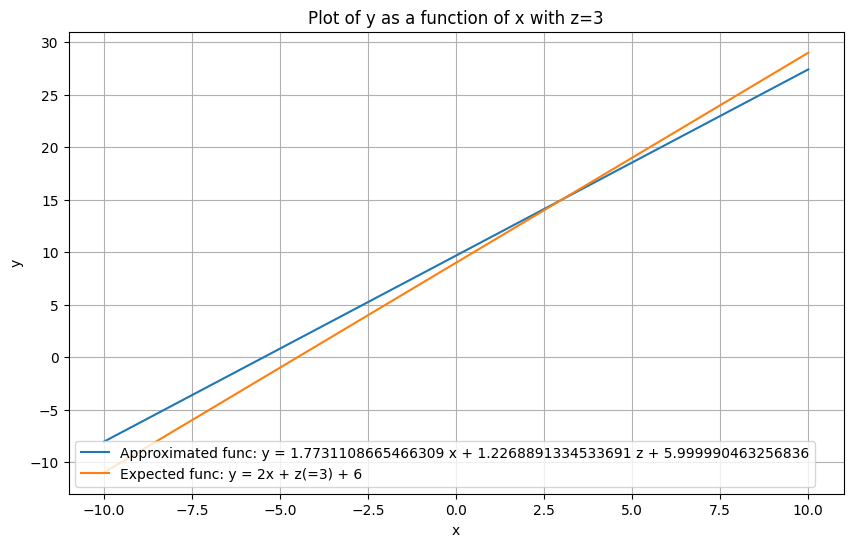

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def approximated_func(best_params, x, z):
    return (best_params[0] + x * best_params[1] + z * best_params[2])

def given_func(x, z):
    return ( 2 * x + z + 6 )

# Define a range for x values and compute y values accordingly
x_values = np.linspace(-10, 10, 400)
z_values = np.linspace(-10, 10, 400)
#y_values = approximated_func(best_params, x_values, z_values)
y_values = approximated_func(best_params, x_values, 3) # Set z=3 so we have a 2D plot
#y_values_opt = given_func(x_values, z_values)
y_values_opt = given_func(x_values, 3) # Set z=3 so we have a 2D plot


# Plot the function
plt.figure(figsize=(10, 6))
plt.plot(x_values, y_values, label=f'Approximated func: y = {best_params[1]} x + {best_params[2]} z + {best_params[0]}')
plt.plot(x_values, y_values_opt, label=f'Expected func: y = 2x + z(=3) + 6')
plt.xlabel("x")
plt.ylabel("y")
plt.title("Plot of y as a function of x with z=3")
plt.legend()
plt.grid(True)
plt.show()


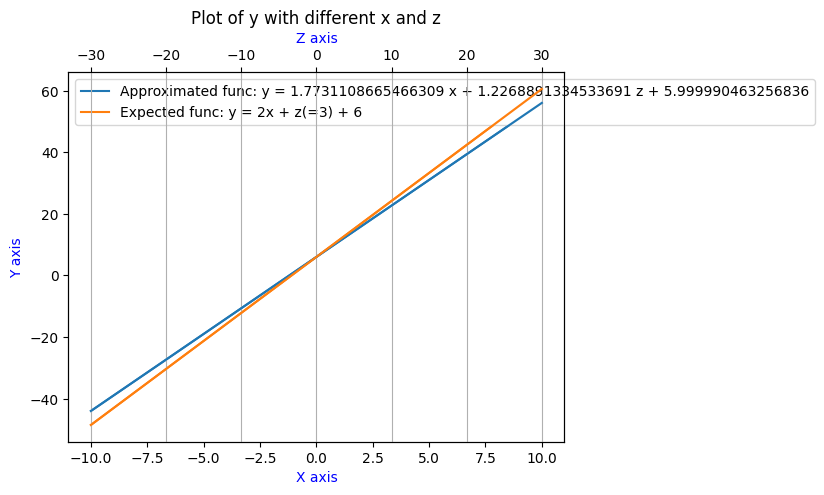

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# approximated function
def approximated_func(best_params, x, z):
    return (best_params[0] + x * best_params[1] + z * best_params[2])

# given function
def given_func(x, z):
    return ( 2 * x + z + 6 )

x_values = np.linspace(-10, 10, 400)
z_values = np.linspace(-30, 30, 400)  # play with this... it fits if set z_values to the same as the x_values since we also teached with this
y_given = given_func(x_values, z_values)
y_approx = approximated_func(best_params, x_values, z_values)

fig, ax1 = plt.subplots()

plt.plot(x_values, y_given, label=f'Approximated func: y = {best_params[1]} x + {best_params[2]} z + {best_params[0]}')
plt.plot(x_values, y_approx, label=f'Expected func: y = 2x + z(=3) + 6')
ax1.set_xlabel('X axis', color='b')
ax1.set_ylabel('Y axis', color='b')
ax1.legend(loc='upper left')

ax2 = ax1.twiny()
ax2.plot(z_values, y_given,)
ax2.plot(z_values, y_approx)
ax2.set_xlabel('Z axis', color='b')

plt.title('Plot of y with different x and z')
plt.grid(True)


plt.show()


## Mit PyTorch und für komplexe nicht-lineare Funktion


### Aufgabe 2
1. Define own non-linear function
2. 5 weights y = a + b x + c x^2 + d x^3 +c x^4
3. In case grade 4 is not enough, try grade 5
4. Plot the results in each case real function vs approximation

#### Zielfunktion => y = x**2 + 3x + 2

#### Hinweise
Wir suchen eine Funktion 4. Grades. Das Ergebnis ist aktuell nicht ideal. Wir haben eine sehr gute Approximation für gewisse X-Werte und eine grosse Abweichung für andere X-Werte. Dies ist geschuldet, dass wir nur 100 x Werte generieren. Die Kurve wird sofort viel besser, wenn wir 2000 Werte generieren

In [ ]:
import torch
import math

dtype = torch.float
device = "cuda" if torch.cuda.is_available() else "cpu"
torch.set_default_device(device)

x = torch.linspace(-5, 5, 100)   # use torch.linspace(-2, 2, 2000) to get much better results
y = x.pow(2) + 3*x +2

## OK, we will do it with five weights instead
## y = a + b x + c x^2 + d x^3 + e x^4
a = torch.randn((), dtype=dtype, requires_grad=True)
b = torch.randn((), dtype=dtype, requires_grad=True)
c = torch.randn((), dtype=dtype, requires_grad=True)
d = torch.randn((), dtype=dtype, requires_grad=True)
## new one
e = torch.randn((), dtype=dtype, requires_grad=True)

learning_rate = 1e-7
for t in range(10000):
    # Forward pass: compute predicted y using operations on Tensors.
    #y_pred = a + b * x + c * x ** 2 + d * x ** 3
    y_pred = a + b * x + c * x ** 2 + d * x ** 3 + e * x ** 4

    # Compute and print loss using operations on Tensors.
    # Now loss is a Tensor of shape (1,)
    # loss.item() gets the scalar value held in the loss.
    loss = (y_pred - y).pow(2).sum()   # use mean instead of sum to be able to set the learning rate to 1e-5
    if t % 100 == 99:
        print(t, loss.item())

    # Use autograd to compute the backward pass. This call will compute the
    # gradient of loss with respect to all Tensors with requires_grad=True.
    # After this call a.grad, b.grad. c.grad and d.grad will be Tensors holding
    # the gradient of the loss with respect to a, b, c, d respectively.
    loss.backward()

    # Manually update weights using gradient descent. Wrap in torch.no_grad()
    # because weights have requires_grad=True, but we don't need to track this
    # in autograd.
    with torch.no_grad():
        a -= learning_rate * a.grad
        b -= learning_rate * b.grad
        c -= learning_rate * c.grad
        d -= learning_rate * d.grad
        ## new one
        e -= learning_rate * e.grad

        # Manually zero the gradients after updating weights
        a.grad = None
        b.grad = None
        c.grad = None
        d.grad = None
        ## new one
        e.grad = None

#print(f'Result: y = {a.item()} + {b.item()} x + {c.item()} x^2 + {d.item()} x^3')
print(f'Result: y = {a.item()} + {b.item()} x + {c.item()} x^2 + {d.item()} x^3 + {e.item()} x^4')


99 2774.692138671875
199 2741.721435546875
299 2717.874267578125
399 2694.5732421875
499 2671.796142578125
599 2649.5234375
699 2627.736328125
799 2606.4150390625
899 2585.54296875
999 2565.10400390625
1099 2545.082275390625
1199 2525.4609375
1299 2506.2265625
1399 2487.36328125
1499 2468.859130859375
1599 2450.70166015625
1699 2432.877197265625
1799 2415.373779296875
1899 2398.180419921875
1999 2381.286376953125
2099 2364.680908203125
2199 2348.353515625
2299 2332.29541015625
2399 2316.49755859375
2499 2300.949951171875
2599 2285.64501953125
2699 2270.57421875
2799 2255.73046875
2899 2241.10498046875
2999 2226.69189453125
3099 2212.4833984375
3199 2198.473876953125
3299 2184.656005859375
3399 2171.0244140625
3499 2157.572998046875
3599 2144.29638671875
3699 2131.18896484375
3799 2118.245849609375
3899 2105.4619140625
3999 2092.83251953125
4099 2080.353515625
4199 2068.019775390625
4299 2055.827880859375
4399 2043.7735595703125
4499 2031.85302734375
4599 2020.062255859375
4699 2008.397

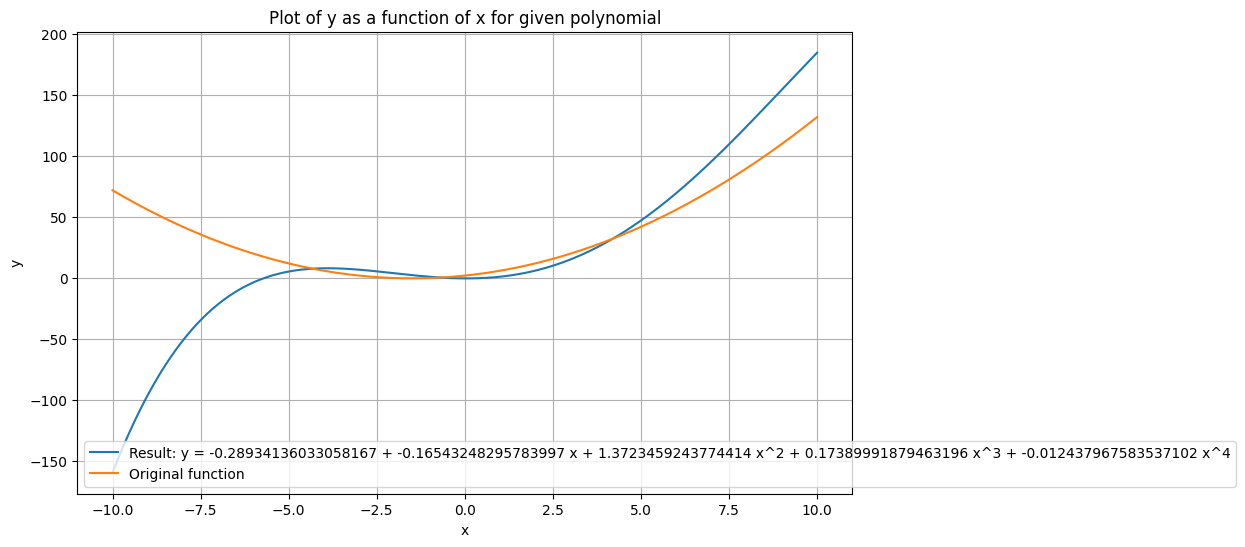

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define the formula as a function
def polynomial(x):
    return (a.item()
            + b.item() * x
            + c.item() * x**2
            + d.item() * x**3
            + e.item() * x**4)

def polynomialOpt(x):
    return ( x**2 + 3 * x + 2 )

# Define a range for x values and compute y values accordingly
x_values = np.linspace(-10, 10, 400)  # Chose range -10 to 10 based on expected behavior
y_values = polynomial(x_values)
y_values_opt = polynomialOpt(x_values)

# Plot the function
plt.figure(figsize=(10, 6))
plt.plot(x_values, y_values, label=f'Result: y = {a.item()} + {b.item()} x + {c.item()} x^2 + {d.item()} x^3 + {e.item()} x^4')
plt.plot(x_values, y_values_opt, label="Original function")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Plot of y as a function of x for given polynomial")
plt.legend()
plt.grid(True)
plt.show()

## Mit PyTorch und nn module

### Aufgabe 3 (wenn 1 und 2 fertig sind) - optional - Lösung
1. Wie Augabe 2 nur mit nn lösen (d.h. zu approximierende Funktion, gleiche Werte, gleicher Polynom) - nur alles mit nn alalog dem Bespiel unten

2. Loss während dem Training plotten

#### Zielfunktion => y = x**2 + 3x + 2

99 760.5478515625
199 168.65187072753906
299 39.6742057800293
399 10.107597351074219
499 2.9300365447998047
599 0.999919593334198
699 0.3973545432090759
799 0.17565849423408508
899 0.08248834311962128
999 0.0399172306060791
1099 0.01958777941763401
1199 0.009672832675278187
1299 0.0047897775657474995
1399 0.0023747615050524473
1499 0.0011782118817791343
1599 0.0005847765132784843
1699 0.0002905789588112384
1799 0.00014453212497755885
1899 7.190980977611616e-05
1999 3.6047193134436384e-05
2099 1.8115126295015216e-05
2199 9.062971912499052e-06
2299 4.736677510663867e-06
2399 2.4540199774492066e-06
2499 1.2154374644524069e-06
2599 6.585838718820014e-07
2699 4.0270958834298654e-07
2799 2.8806061891373247e-07
2899 2.1855710485851887e-07
2999 1.814088648188772e-07
Result for no optimizer: y = 2.0000131130218506 + 2.999986410140991 x + 0.9999819993972778 x^2 + 4.738225925393635e-06 x^3 + 4.30163254350191e-06 x^4


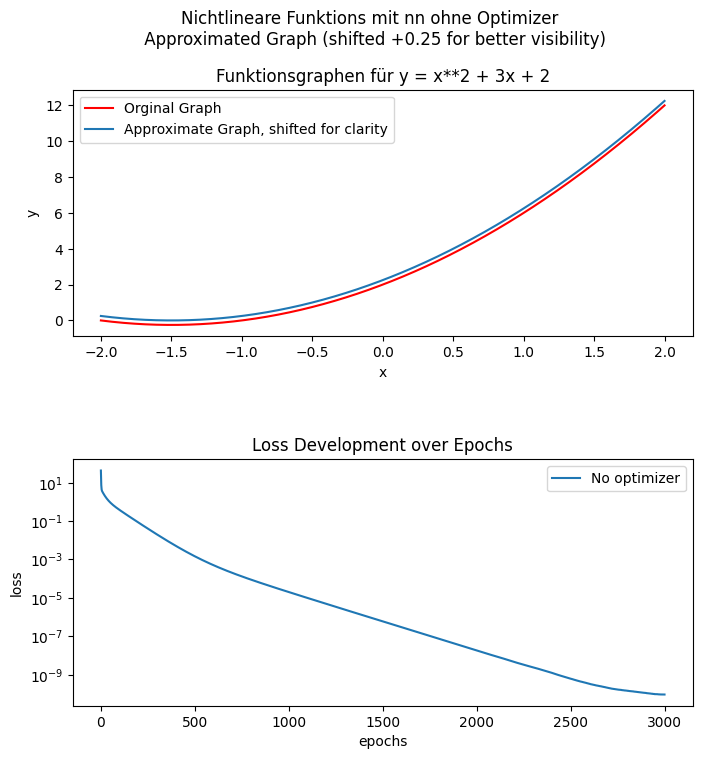

In [ ]:
# -*- coding: utf-8 -*-
import torch
import math


# Create Tensors to hold input and outputs.
lowerlimit_x_ex3 = -2 # Lower limit of x range
upperlimit_x_ex3 = 2 # Upper limit of x range
steps_x_ex3 = 2000 # Number of steps between lower and upper limit
x = torch.linspace(lowerlimit_x_ex3, upperlimit_x_ex3, steps_x_ex3)
# Zielfunktion => y = x**2 + 3x + 2
y = x.pow(2) + 3*x +2

# For this example, the output y is a linear function of (x, x^2, x^3, x^4), so
# we can consider it as a linear layer neural network. Let's prepare the
# tensor (x, x^2, x^3, x^4).
p = torch.tensor([1, 2, 3, 4])
xx = x.unsqueeze(-1).pow(p)
# xx now has 4 colums, each column is a power of x, i.e. x, x^2, x^3, x^4



# In the above code, x.unsqueeze(-1) has shape (2000, 1), and p has shape
# (4,), for this case, broadcasting semantics will apply to obtain a tensor
# of shape (2000, 4)

# Use the nn package to define our model as a sequence of layers. nn.Sequential
# is a Module which contains other Modules, and applies them in sequence to
# produce its output. The Linear Module computes output from input using a
# linear function, and holds internal Tensors for its weight and bias.
# The Flatten layer flatens the output of the linear layer to a 1D tensor,
# to match the shape of `y`.
model_ex3 = torch.nn.Sequential(
    torch.nn.Linear(4, 1),
    torch.nn.Flatten(0, 1),

)

# The nn package also contains definitions of popular loss functions; in this
# case we will use Mean Squared Error (MSE) as our loss function.
loss_fn = torch.nn.MSELoss(reduction='sum')
loss_values_ex3 = [] # List to store loss values over epochs for tracking

learning_rate_ex3 = 1e-5
epochs_ex3 = 3000
for t in range(epochs_ex3):

    # Forward pass: compute predicted y by passing x to the model. Module objects
    # override the __call__ operator so you can call them like functions. When
    # doing so you pass a Tensor of input data to the Module and it produces
    # a Tensor of output data.
    y_pred = model_ex3(xx)

    # Compute and print loss. We pass Tensors containing the predicted and true
    # values of y, and the loss function returns a Tensor containing the
    # loss.
    loss = loss_fn(y_pred, y)
    if t % 100 == 99:
        print(t, loss.item())

    loss_values_ex3.append(loss.item()/steps_x_ex3) # Append current loss for analysis


    # Zero the gradients before running the backward pass.
    model_ex3.zero_grad()

    # Backward pass: compute gradient of the loss with respect to all the learnable
    # parameters of the model. Internally, the parameters of each Module are stored
    # in Tensors with requires_grad=True, so this call will compute gradients for
    # all learnable parameters in the model.
    loss.backward()

    # Update the weights using gradient descent. Each parameter is a Tensor, so
    # we can access its gradients like we did before.
    with torch.no_grad():
        for param in model_ex3.parameters():
            param -= learning_rate_ex3 * param.grad

# You can access the first layer of `model` like accessing the first item of a list
linear_layer_ex3 = model_ex3[0]

# For linear layer, its parameters are stored as `weight` and `bias`.
print(f'Result for no optimizer: y = {linear_layer_ex3.bias.item()} + {linear_layer_ex3.weight[:, 0].item()} x + {linear_layer_ex3.weight[:, 1].item()} x^2 + {linear_layer_ex3.weight[:, 2].item()} x^3 + {linear_layer_ex3.weight[:, 3].item()} x^4')


# create a plot

# Original polynomial function for comparison
def polynomial_orginal(x):
    return x.pow(2) + 3*x + 2

# Approximated polynomial function using the trained model's parameters
def ApproximationModel(x):
    return (linear_layer_ex3.bias.item()
            + linear_layer_ex3.weight[:, 0].item() * x
            + linear_layer_ex3.weight[:, 1].item() * x**2
            + linear_layer_ex3.weight[:, 2].item() * x**3
            + linear_layer_ex3.weight[:, 3].item() * x**4)

# Define a range for x values and compute y values accordingly
x_values = torch.linspace(lowerlimit_x_ex3, upperlimit_x_ex3, steps_x_ex3)
y_values_org = polynomial_orginal(x_values) # Original y values based on polynomial function
y_values_model = ApproximationModel(x_values) # Approximated y values from the trained model

# Plotting the original and approximated function graph
fig1, axs = plt.subplots(2, figsize=(8, 8))
fig1.suptitle('Nichtlineare Funktions mit nn ohne Optimizer \n Approximated Graph (shifted +0.25 for better visibility)')
plt.subplots_adjust(hspace=0.5)
# Plot the function graph for y = x**2 + 3x + 2
axs[0].set_title("Funktionsgraphen für y = x**2 + 3x + 2")
axs[0].set_xlabel("x")
axs[0].set_ylabel("y")
axs[0].plot(x_values, y_values_org, color='red', label="Orginal Graph") # Original function plot
axs[0].plot(x_values, y_values_model + 0.25, label="Approximate Graph, shifted for clarity") # Approximated function plot (shifted for clarity). Label added to the graph
axs[0].legend()

# Plot the loss development over epochs for each optimizer
x_items_loss_ex3 = len(loss_values_ex3) # Number of recorded loss values
axs[1].set_yscale('log') # Logarithmic scale for better visibility of loss reduction
axs[1].set_title("Loss Development over Epochs")
axs[1].set_xlabel("epochs")
axs[1].set_ylabel("loss")
axs[1].plot(np.linspace(0, epochs_ex3 -1 , x_items_loss_ex3), loss_values_ex3, label="No optimizer") # Loss with no optimizer
axs[1].legend()
# Display the plots
plt.show()

## ... mit einem Optimizer

### Aufgabe 4 (wenn 1, 2 und fertig sind) - optional - Lösung
1. Wie Augabe 3 nur mit nn **und Optimizer** lösen
2. Loss während dem Training plotten und mit dem Plot von Aufgabe 3 vergleichen
3. BONUS: Adam, RMSprop, SGD


#### Zielfunktion => y = x**2 + 3x + 2

Klasse Neuronal Netz mit Konstruktor und Methode TrainNet

Auffälligkeiten und Beobachtungen:


*   Lernrate ist extrem sensibel. Raten grösser als 1e-5 führen zu Fehlern, Lernraten kleiner 1e-8 oder 1e-9 führen dazu, dass die Anzahl der Epochen sehr hoch gewählt werden muss um ein vernünftiges Ergebniss zu bekommen. Es kann dann auch passieren, dass gar keine befriedigendes Ergebniss erzielt wird
*   Der Optimizer hat in diesem Beispiel nur eine Nebenrolle. Auch ohne Optimizer können recht schnell gute Ergebnisse erzielt werden
*   Sehr viel mehr Epochen führen nicht zu weiterer merklicher Verbesserung, dies speziell bei einer niedrigen Lernrate
*   Die Optimizer verhalten sich recht unterschiedlich. Der RMSProp ist dabei am Auffälligsten. (Anmerk., das Zickzack schaut für mich aus, als ob der Optimizier versuchen würde aus einem lokalen Minimum herauszukommen). SGD benötigt andere Learn-Rate und somit auch mehrere Epochs ansonsten ist er ungenau.



Setting up model
Start Calculation, using optimizer Adam
99 0.415803466796875
199 0.08802139282226562
299 0.019155145645141602
399 0.004172579765319824
499 0.0009106461405754089
599 0.00019964352250099183
699 4.418991133570671e-05
799 1.0023961775004865e-05
899 2.3826526012271645e-06
999 6.187772960402072e-07
1099 1.8432864453643562e-07
1199 6.482355092884973e-08
1299 2.6359939511166887e-08
1399 1.1897546755790245e-08
1499 5.660577699018177e-09
1599 2.7351429707778152e-09
1699 1.4150516562949633e-09
1799 7.486599997719168e-10
1899 3.968761177475244e-10
1999 2.3350315814241186e-10
2099 1.3798066333947645e-10
2199 8.432191123119993e-11
2299 7.957597603081013e-11
2399 7.958490044757127e-11
2499 7.957392966773113e-11
2599 7.957347492038025e-11
2699 7.957392966773113e-11
2799 7.957944347936063e-11
2899 7.957392966773113e-11
2999 7.957887504517202e-11
Result for Adam: y = 1.99998939037323 + 2.999986410140991 x + 1.0000178813934326 x^2 + 4.745693786389893e-06 x^3 + -4.553417511488078e-06 x^4


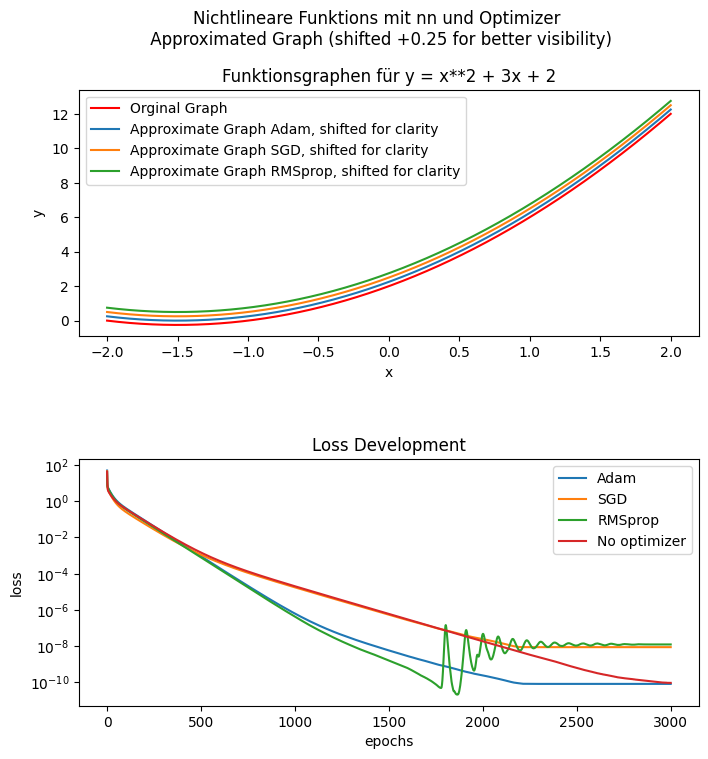

In [ ]:
# Initial imports
import numpy as np
import matplotlib.pyplot as plt
import torch

# Class definition for a neural network model
class NeuronalNet:
    def __init__(self, upperlimit_x, lowerlimit_x, anzahlWerte) -> None: # Initialize the model with the range and number of values
        print("Setting up model")
        self.upperlimit_x = upperlimit_x # Upper limit of the range for x
        self.lowerlimit_x = lowerlimit_x # Lower limit of the range for x
        self.anzahlWerte = anzahlWerte # Number of points to generate in the range

        # Generate x values between specified limits
        self.x = torch.linspace(self.lowerlimit_x, self.upperlimit_x, self.anzahlWerte)
        # Define the target function y as a quadratic polynomial
        self.y = self.x.pow(2) + 3*self.x + 2

        # Tensor exponentiations of x for polynomial fitting
        p = torch.tensor([1, 2, 3, 4]) # Powers to which x will be raised
        self.xx = self.x.unsqueeze(-1).pow(p) # Polynomial expansion of x for model input

        # Define an "nn" neural network model
        self.model = torch.nn.Sequential(
        torch.nn.Linear(4, 1), # Linear layer mapping from polynomial features (4) to single output (1)
        torch.nn.Flatten(0, 1)) # Flatten output to make further processing easier

        # Define the loss function as mean squared error
        self.loss_fn = torch.nn.MSELoss(reduction='sum')
        self.loss_values = [] # List to store loss values over epochs for tracking
        pass

    # Method to train the network
    def TrainNetzwerk(self, optimizer_name, learning_rate, epochs):

        print(f"Start Calculation, using optimizer {optimizer_name}")

        # Select optimizer based on input parameter
        if optimizer_name == 'Adam':
            self.optimizer = torch.optim.Adam(self.model.parameters(), learning_rate)

        if optimizer_name == 'SGD':
            self.optimizer = torch.optim.SGD(self.model.parameters(), learning_rate)

        if optimizer_name == 'RMSprop':
            self.optimizer = torch.optim.RMSprop(self.model.parameters(), learning_rate)

        # Training loop
        for t in range(epochs):
            y_pred = self.model(self.xx) # Forward pass: predict y using current model weights

            self.loss = self.loss_fn(y_pred, self.y) # Compute the loss between predicted and actual y
            if t % 100 == 99: # Print loss every 100 epochs for progress tracking
                print(t, self.loss.item()/self.anzahlWerte)

            self.loss_values.append(self.loss.item()/self.anzahlWerte) # Append current loss for analysis

            self.model.zero_grad() # Reset gradients to zero

            self.loss.backward() # Backward pass: compute gradients of the loss

            self.optimizer.step() # Update model parameters based on gradients

            # This is a manual step to fudge the updates rather than letting pytorch do it for us (with only the previous line), perhaps we could add the code to figure out the best learning rate (see Teams chat) and drop this step?
            with torch.no_grad():
                for param in self.model.parameters():
                    param -= learning_rate * param.grad

        print(f'Result for {optimizer_name}: y = {self.model[0].bias.item()} + {self.model[0].weight[:, 0].item()} x + {self.model[0].weight[:, 1].item()} x^2 + {self.model[0].weight[:, 2].item()} x^3 + {self.model[0].weight[:,3].item()} x^4')
        return self.model[0], self.loss_values

#Zielfunktion => y = x**2 + 3x + 2

# Set up parameters for the NeuronalNet model
upperlimit_x = 2 # Upper limit of x range
lowerlimit_x = -2 # Lower limit of x range
anzahlWerte = 2000 # Number of points to generate in the range
epochs = 3000 # Number of training epochs
learning_rate = 1e-5 # Learning rate for the optimizer - maybe automate this value calculation (see above)

# Use a dictionary to store results for each optimizer so code is easier to read
optimizers = ['Adam', 'SGD', 'RMSprop']
results = {}  # Dictionary of results for each optimizer

# Loop through each optimizer type, creating and training a model
for optimizer_name in optimizers:
    net = NeuronalNet(upperlimit_x, lowerlimit_x, anzahlWerte)
    if (optimizer_name == 'SGD'):
        # For SGD optimizer, use a lower learning rate and more epochs
        linear_layer, loss_values = net.TrainNetzwerk(optimizer_name, 1e-6, epochs * 5)
    else:
        linear_layer, loss_values = net.TrainNetzwerk(optimizer_name, learning_rate, epochs)
    results[optimizer_name] = (linear_layer, loss_values)

# Extract the polynomial coefficients learned by the model (from Adam optimizer as example)
# linear_layer = results['Adam'][0]  # Use the model trained with Adam optimizer for output
# print(f'Result for Adam used in plot: y = {linear_layer.bias.item()} + {linear_layer.weight[:, 0].item()} x + {linear_layer.weight[:, 1].item()} x^2 + {linear_layer.weight[:, 2].item()} x^3 + {linear_layer.weight[:,3].item()} x^4')

# Original polynomial function for comparison
def polynomial_orginal(x):
    return x.pow(2) + 3*x + 2

# Approximated polynomial function using the trained model's parameters
def polynomial_model(linear_layer_approx, x):
    print(f'Create values for plot: y = {linear_layer_approx.bias.item()} + {linear_layer_approx.weight[:, 0].item()} x + {linear_layer_approx.weight[:, 1].item()} x^2 + {linear_layer_approx.weight[:, 2].item()} x^3 + {linear_layer_approx.weight[:,3].item()} x^4')
    return (linear_layer_approx.bias.item()
            + linear_layer_approx.weight[:, 0].item() * x
            + linear_layer_approx.weight[:, 1].item() * x**2
            + linear_layer_approx.weight[:, 2].item() * x**3
            + linear_layer_approx.weight[:, 3].item() * x**4)

# Define a range for x values and compute y values accordingly
x_values = torch.linspace(lowerlimit_x, upperlimit_x, anzahlWerte)
y_values_org = polynomial_orginal(x_values) # Original y values based on polynomial function


# Plotting the original and approximated function graphs, and loss over epochs for each optimizer
fig1, axs = plt.subplots(2, figsize=(8, 8))
fig1.suptitle('Nichtlineare Funktions mit nn und Optimizer \n Approximated Graph (shifted +0.25 for better visibility)')
plt.subplots_adjust(hspace=0.5)
# Plot the function graph for y = x**2 + 3x + 2
axs[0].set_title("Funktionsgraphen für y = x**2 + 3x + 2")
axs[0].set_xlabel("x")
axs[0].set_ylabel("y")
axs[0].plot(x_values, y_values_org, color='red', label="Orginal Graph") # Original function plot
shift_factor = 0
for optimizer_name in optimizers:
    shift_factor += 1
    y_values_model = polynomial_model(results[optimizer_name][0], x_values)  # Approximated y values from the trained model
    axs[0].plot(x_values, y_values_model + (0.25 * shift_factor), label=f"Approximate Graph {optimizer_name}, shifted for clarity") # Approximated function plot (shifted for clarity). Label added to the graph

axs[0].legend()

# Plot the loss development over epochs for each optimizer
x_items_loss = len(loss_values) # Number of recorded loss values
axs[1].set_yscale('log') # Logarithmic scale for better visibility of loss reduction
axs[1].set_title("Loss Development")
axs[1].set_xlabel("epochs")
axs[1].set_ylabel("loss")
# Plot the losses from the dictionary
for optimizer_name in optimizers:
    loss_values = results[optimizer_name][1]
    x_items_loss = len(loss_values)   # Number of recorded loss values
    axs[1].plot(np.linspace(0, epochs - 1, x_items_loss), loss_values, label=optimizer_name)
axs[1].plot(np.linspace(0, epochs_ex3 -1 , x_items_loss_ex3), loss_values_ex3, label="No optimizer") # Loss with no optimizer

axs[1].legend()
# Display the plots
plt.show()